In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from util import load_data, extract_feature, split_data, get_result
from model import bi_lstm_model

## Train Bi-LSTM

In [2]:
# load the dataset
X, y = load_data()

# split the data into training, validation and testing sets
data = split_data(X, y, test_size=0.2, valid_size=0.2)

y_train = data["y_train"].reshape(-1).astype(int)
y_valid = data["y_valid"].reshape(-1).astype(int)
y_test = data["y_test"].reshape(-1).astype(int)
time_steps = data["time_steps"]
num_features = data["n_features"]
num_samples = data["n_samples"]

# construct the model
model = bi_lstm_model(time_steps, num_features)

# use tensorboard to view metrics
tensorboard = TensorBoard(log_dir="logs")
# define early stopping to stop training after 5 epochs of not improving
early_stopping = EarlyStopping(mode="min", patience=3, restore_best_weights=True)

batch_size = 32
epochs = 200

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)

# train the model using the training set and validating using validation set
history = model.fit(data["X_train"], y_train, epochs=epochs, batch_size=batch_size, validation_data=(data["X_valid"], y_valid),
          callbacks=[tensorboard, early_stopping])

# save the model to a file
model.save("results/bilstm.h5")

# evaluating the model using the testing set
print(f"Evaluating the model using {len(data['X_test'])} samples...")
loss, accuracy = model.evaluate(data["X_test"], y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy*100:.2f}%")

Total neutral samples: 81
Total positive samples: 97
Total negative samples: 102


Loading data: 100%|██████████████████████████████████████████████████████████████████| 280/280 [00:12<00:00, 21.55it/s]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 1, 512)           788480    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

## Test Bi-LSTM

In [3]:
feat = extract_feature("datasets/all/24.wav", mfcc=True)
feat = np.expand_dims(feat, axis=0)  # Add an extra dimension at the beginning
feat = np.expand_dims(feat, axis=1)

prediction = model.predict(feat)

predicted_class = np.argmax(prediction)

print(prediction)
get_result(predicted_class)

1/1 [==============================] - 2s 2s/step
[[3.8356911e-02 1.6204805e-04 9.6148109e-01]]


['positive']

In [4]:
feat = extract_feature("datasets/all/h01.wav", mfcc=True)
feat = np.expand_dims(feat, axis=0)  # Add an extra dimension at the beginning
feat = np.expand_dims(feat, axis=1)

prediction = model.predict(feat)

predicted_class = np.argmax(prediction)

print(prediction)
get_result(predicted_class)

1/1 [==============================] - 0s 27ms/step
[[2.0665763e-02 6.0442624e-05 9.7927380e-01]]


['positive']

In [5]:
feat = extract_feature("datasets/all/d01.wav", mfcc=True)
feat = np.expand_dims(feat, axis=0)  # Add an extra dimension at the beginning
feat = np.expand_dims(feat, axis=1)

prediction = model.predict(feat)

predicted_class = np.argmax(prediction)

print(prediction)
get_result(predicted_class)

1/1 [==============================] - 0s 34ms/step
[[0.99176943 0.00403263 0.00419792]]


['negative']

In [5]:
feat = extract_feature("datasets/all/d15.wav", mfcc=True)
feat = np.expand_dims(feat, axis=0)  # Add an extra dimension at the beginning
feat = np.expand_dims(feat, axis=1)

prediction = model.predict(feat)

predicted_class = np.argmax(prediction)

print(prediction)
get_result(predicted_class)

1/1 [==============================] - 0s 27ms/step
[[9.8067379e-01 3.4752488e-04 1.8978644e-02]]


['negative']

## Learning Stats for Bi-LSTM

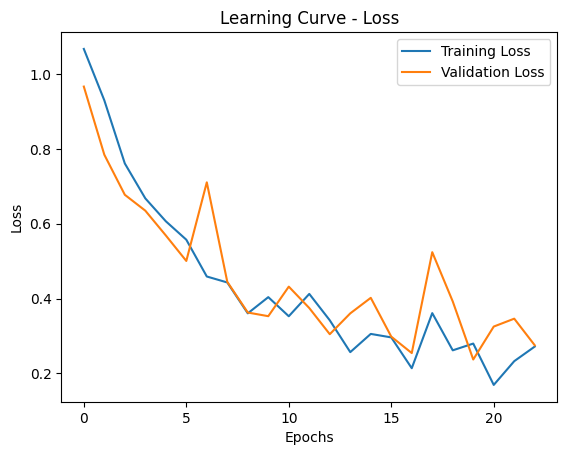

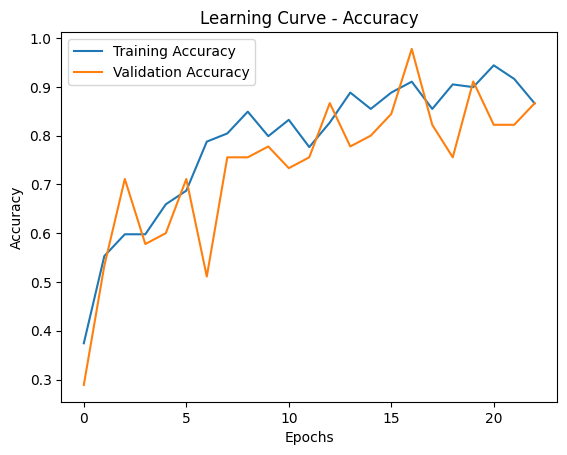

In [6]:
# Extract the values of the metrics from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the learning curve for loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the learning curve for accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()